# FedEx Project 3

# Explanation of the dataset:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
delivery = pd.read_csv('FedEx Dataset.csv')

In [6]:
delivery 

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0


In [7]:
delivery.nunique()

Year                        1
Month                       6
DayofMonth                 31
DayOfWeek                   7
Actual_Shipment_Time     1439
Planned_Shipment_Time    1188
Planned_Delivery_Time    1353
Carrier_Name               20
Carrier_Num              7340
Planned_TimeofTravel      499
Shipment_Delay            997
Source                    297
Destination               299
Distance                 1423
Delivery_Status             2
dtype: int64

In [8]:
delivery.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [9]:
delivery.shape

(3604175, 15)

In [11]:
print(delivery['Actual_Shipment_Time'].unique())
print(delivery['Delivery_Status'].unique())


[2003.  754.  628. ...  339.  343.  342.]
[ 0.  1. nan]


In [12]:
delivery['Actual_Shipment_Time'].fillna(delivery['Actual_Shipment_Time'].median(),inplace = True)
delivery['Planned_TimeofTravel'].fillna(delivery['Planned_TimeofTravel'].median(),inplace = True)
delivery['Shipment_Delay'].fillna(delivery['Shipment_Delay'].median(),inplace = True)
delivery['Delivery_Status'].fillna(delivery['Delivery_Status'].median(),inplace = True)

In [13]:
delivery['Actual_Shipment_Time'] = delivery['Actual_Shipment_Time'].astype('int')
delivery['Planned_TimeofTravel'] = delivery['Planned_TimeofTravel'].astype('int')
delivery['Shipment_Delay'] = delivery['Shipment_Delay'].astype('int')
delivery['Delivery_Status'] = delivery['Delivery_Status'].astype('int')

In [14]:
delivery.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

In [15]:
delivery 

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003,1955,2225,WN,335,150,8,IAD,TPA,810,0
1,2008,1,3,4,754,735,1000,WN,3231,145,19,IAD,TPA,810,1
2,2008,1,3,4,628,620,750,WN,448,90,8,IND,BWI,515,0
3,2008,1,3,4,926,930,1100,WN,1746,90,-4,IND,BWI,515,0
4,2008,1,3,4,1829,1755,1925,WN,3920,90,34,IND,BWI,515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059,1100,1256,DL,1547,236,-1,ATL,JAC,1572,0
3604171,2008,6,19,4,555,600,738,DL,1548,98,-5,RSW,ATL,515,0
3604172,2008,6,19,4,821,827,1003,DL,1548,96,-6,ATL,IND,432,0
3604173,2008,6,19,4,718,735,852,DL,1551,77,-17,CAE,ATL,191,0


In [16]:
delivery.columns.values

array(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'], dtype=object)

In [17]:
delivery.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.604175e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338241e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291576e+02,1.088364e+01,7.280915e+02,1.992728e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.759264e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.950520e+01,3.582255e+01,5.611318e+02,3.994536e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.340000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.727000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


In [20]:
delivery.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,3604175.0,NaN,NaN,NaN,2008.0,0.0,2008.0,2008.0,2008.0,2008.0,2008.0
Month,3604175.0,NaN,NaN,NaN,3.514942,1.709912,1.0,2.0,4.0,5.0,6.0
DayofMonth,3604175.0,NaN,NaN,NaN,15.68481,8.763332,1.0,8.0,16.0,23.0,31.0
DayOfWeek,3604175.0,NaN,NaN,NaN,3.934604,1.987126,1.0,2.0,4.0,6.0,7.0
Actual_Shipment_Time,3604175.0,NaN,NaN,NaN,1338.240576,475.926397,1.0,934.0,1329.0,1727.0,2400.0
Planned_Shipment_Time,3604175.0,NaN,NaN,NaN,1329.37051,466.436502,0.0,925.0,1321.0,1720.0,2359.0
Planned_Delivery_Time,3604175.0,NaN,NaN,NaN,1495.304509,485.482513,0.0,1115.0,1519.0,1910.0,2400.0
Carrier_Name,3604175,20,WN,602447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier_Num,3604175.0,NaN,NaN,NaN,2223.794964,1944.582702,1.0,616.0,1573.0,3602.0,9741.0
Planned_TimeofTravel,3604175.0,NaN,NaN,NaN,129.157588,69.505197,-25.0,80.0,111.0,160.0,1435.0


In [21]:
delivery.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3604170    False
3604171    False
3604172    False
3604173    False
3604174    False
Length: 3604175, dtype: bool

In [22]:
delivery.duplicated().sum()

4

In [23]:
delivery[delivery.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
938221,2008,2,28,4,829,835,1350,F9,728,195,-6,DEN,DCA,1476,0
938223,2008,2,28,4,1427,1435,1636,F9,727,241,-8,DCA,DEN,1476,0
938225,2008,2,28,4,1854,1807,1902,F9,773,115,47,DEN,LAS,629,1
938227,2008,2,28,4,2027,1942,2229,F9,780,107,45,LAS,DEN,629,1


In [24]:
delivery.drop_duplicates(inplace=True)

In [25]:
delivery.duplicated().sum()

0

In [26]:
delivery[delivery.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status


In [27]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604171 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Year                   int64 
 1   Month                  int64 
 2   DayofMonth             int64 
 3   DayOfWeek              int64 
 4   Actual_Shipment_Time   int32 
 5   Planned_Shipment_Time  int64 
 6   Planned_Delivery_Time  int64 
 7   Carrier_Name           object
 8   Carrier_Num            int64 
 9   Planned_TimeofTravel   int32 
 10  Shipment_Delay         int32 
 11  Source                 object
 12  Destination            object
 13  Distance               int64 
 14  Delivery_Status        int32 
dtypes: int32(4), int64(8), object(3)
memory usage: 385.0+ MB


In [28]:
delivery.isnull()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3604171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3604172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3604173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
delivery.nunique()

Year                        1
Month                       6
DayofMonth                 31
DayOfWeek                   7
Actual_Shipment_Time     1439
Planned_Shipment_Time    1188
Planned_Delivery_Time    1353
Carrier_Name               20
Carrier_Num              7340
Planned_TimeofTravel      499
Shipment_Delay            997
Source                    297
Destination               299
Distance                 1423
Delivery_Status             2
dtype: int64

In [31]:
delivery

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003,1955,2225,WN,335,150,8,IAD,TPA,810,0
1,2008,1,3,4,754,735,1000,WN,3231,145,19,IAD,TPA,810,1
2,2008,1,3,4,628,620,750,WN,448,90,8,IND,BWI,515,0
3,2008,1,3,4,926,930,1100,WN,1746,90,-4,IND,BWI,515,0
4,2008,1,3,4,1829,1755,1925,WN,3920,90,34,IND,BWI,515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059,1100,1256,DL,1547,236,-1,ATL,JAC,1572,0
3604171,2008,6,19,4,555,600,738,DL,1548,98,-5,RSW,ATL,515,0
3604172,2008,6,19,4,821,827,1003,DL,1548,96,-6,ATL,IND,432,0
3604173,2008,6,19,4,718,735,852,DL,1551,77,-17,CAE,ATL,191,0


In [32]:
delivery.groupby('DayOfWeek').count()

,Year,Month,DayofMonth,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
DayOfWeek,,,,,,,,,,,,,,
1,532778,532778,532778,532778,532778,532778,532778,532778,532778,532778,532778,532778,532778,532778
2,520986,520986,520986,520986,520986,520986,520986,520986,520986,520986,520986,520986,520986,520986
3,529726,529726,529726,529726,529726,529726,529726,529726,529726,529726,529726,529726,529726,529726
4,536016,536016,536016,536016,536016,536016,536016,536016,536016,536016,536016,536016,536016,536016
5,537374,537374,537374,537374,537374,537374,537374,537374,537374,537374,537374,537374,537374,537374
6,444912,444912,444912,444912,444912,444912,444912,444912,444912,444912,444912,444912,444912,444912
7,502379,502379,502379,502379,502379,502379,502379,502379,502379,502379,502379,502379,502379,502379


In [33]:
delivery.groupby('Month').count()

,Year,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
Month,,,,,,,,,,,,,,
1,605765,605765,605765,605765,605765,605765,605765,605765,605765,605765,605765,605765,605765,605765
2,569232,569232,569232,569232,569232,569232,569232,569232,569232,569232,569232,569232,569232,569232
3,616090,616090,616090,616090,616090,616090,616090,616090,616090,616090,616090,616090,616090,616090
4,598126,598126,598126,598126,598126,598126,598126,598126,598126,598126,598126,598126,598126,598126
5,606293,606293,606293,606293,606293,606293,606293,606293,606293,606293,606293,606293,606293,606293
6,608665,608665,608665,608665,608665,608665,608665,608665,608665,608665,608665,608665,608665,608665


In [34]:
delivery.groupby('Delivery_Status').count()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance
Delivery_Status,,,,,,,,,,,,,,
0,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959,2885959
1,718212,718212,718212,718212,718212,718212,718212,718212,718212,718212,718212,718212,718212,718212


In [36]:
delivery.skew()

C:\Users\Tejasva\AppData\Local\Temp\ipykernel_6692\2667925202.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  delivery.skew()


Year                     0.000000
Month                   -0.016887
DayofMonth               0.005830
DayOfWeek                0.048492
Actual_Shipment_Time     0.045731
Planned_Shipment_Time    0.081864
Planned_Delivery_Time   -0.207588
Carrier_Num              0.894850
Planned_TimeofTravel     1.501248
Shipment_Delay           6.326691
Distance                 1.629241
Delivery_Status          1.505696
dtype: float64

1 A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.

2 A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.

3 A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.

In [38]:
delivery[delivery['DayofMonth'] == 1]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
94084,2008,1,1,2,1110,1050,1245,XE,2679,115,20,EWR,MYR,550,1
94111,2008,1,1,2,755,700,821,XE,1,201,55,AUS,ONT,1197,1
94142,2008,1,1,2,1908,1840,2342,XE,10,182,28,ONT,MCI,1318,1
94169,2008,1,1,2,1155,1210,1307,XE,100,57,-15,FAT,ONT,222,0
94200,2008,1,1,2,1318,1315,1558,XE,102,103,3,ONT,ELP,670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581798,2008,6,1,7,1729,1729,1854,DL,1963,85,0,LGA,DCA,214,0
3581799,2008,6,1,7,1830,1830,1947,DL,1964,77,0,DCA,LGA,214,0
3581800,2008,6,1,7,1828,1829,1951,DL,1965,82,-1,LGA,DCA,214,0
3581801,2008,6,1,7,2027,2030,2147,DL,1968,77,-3,DCA,LGA,214,0


In [39]:
delivery[delivery['DayofMonth']==25]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
71324,2008,1,25,5,2014,1950,2145,WN,2271,55,24,ABQ,AMA,277,1
71325,2008,1,25,5,900,900,1435,WN,213,215,0,ABQ,BWI,1670,0
71326,2008,1,25,5,1429,1430,1705,WN,45,95,-1,ABQ,DAL,580,0
71327,2008,1,25,5,2058,2020,2245,WN,375,85,38,ABQ,DAL,580,1
71328,2008,1,25,5,1604,1555,1830,WN,720,95,9,ABQ,DAL,580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580503,2008,6,25,3,1122,1102,1212,CO,1587,130,20,ATL,IAH,689,1
3580523,2008,6,25,3,727,730,946,CO,270,196,-3,EWR,MSP,1008,0
3580538,2008,6,25,3,2130,2110,700,CO,781,410,20,ANC,IAH,3266,1
3580556,2008,6,25,3,2120,2005,2205,CO,684,120,75,IAH,MCI,643,1


In [40]:
print(delivery['Actual_Shipment_Time'].max())
print(delivery['Planned_Shipment_Time'].max())
print(delivery['Planned_TimeofTravel'].max())
print(delivery['Distance'].max())
print(delivery['Shipment_Delay'].max())

2400
2359
1435
4962
2467


In [41]:
delivery[delivery['Delivery_Status'] == 1].sort_values('Actual_Shipment_Time',ascending=False).max()

Year                     2008
Month                       6
DayofMonth                 31
DayOfWeek                   7
Actual_Shipment_Time     2400
Planned_Shipment_Time    2359
Planned_Delivery_Time    2400
Carrier_Name               YV
Carrier_Num              9740
Planned_TimeofTravel      660
Shipment_Delay           2467
Source                    YUM
Destination               YUM
Distance                 4962
Delivery_Status             1
dtype: object

In [42]:
delivery[delivery['Delivery_Status'] == 1].sort_values('Actual_Shipment_Time',ascending=False).min()

Year                     2008
Month                       1
DayofMonth                  1
DayOfWeek                   1
Actual_Shipment_Time        1
Planned_Shipment_Time       0
Planned_Delivery_Time       0
Carrier_Name               9E
Carrier_Num                 1
Planned_TimeofTravel      -21
Shipment_Delay             16
Source                    ABE
Destination               ABE
Distance                   11
Delivery_Status             1
dtype: object

In [43]:
delivery['DayOfWeek'].value_counts()

5    537374
4    536016
1    532778
3    529726
2    520986
7    502379
6    444912
Name: DayOfWeek, dtype: int64

In [44]:
delivery['Delivery_Status'].value_counts()

0    2885959
1     718212
Name: Delivery_Status, dtype: int64

In [45]:
delivery['Month'].value_counts()

3    616090
6    608665
5    606293
1    605765
4    598126
2    569232
Name: Month, dtype: int64

In [47]:
delivery.pivot_table(index =['DayOfWeek','Month'],values = ['Planned_Shipment_Time','Actual_Shipment_Time'],columns='Delivery_Status')

Actual_Shipment_Time              Planned_Shipment_Time  \
Delivery_Status                    0            1                     0   
DayOfWeek Month                                                           
1         1              1286.203359  1548.277827           1289.404671   
          2              1274.979458  1548.693152           1285.686536   
          3              1279.558087  1551.383241           1287.085837   
          4              1289.818167  1553.195321           1297.056066   
          5              1302.812455  1547.468742           1309.224476   
          6              1271.196272  1574.270585           1279.054111   
2         1              1293.771448  1552.996345           1300.884140   
          2              1268.082087  1564.859389           1280.928611   
          3              1282.248893  1571.345006           1291.207480   
          4              1292.352028  1550.642878           1301.285354   
          5              1282.328895  1591.050134           1290.732229   
          6              1268.634798  1591.842912           1277.439612   
3         1              1293.188195  1528.224041           1300.500885   
          2              1288.177191  1542.928625           1292.105735   
          3              1283.220231  1575.090170           1287.509699   
          4              1298.246328  1562.563689           1303.494792   
          5              1296.341870  1538.896858           1301.126969   
          6              1259.884554  1614.712229           1267.631499   
4         1              1267.253900  1584.388585           1273.756219   
          2              1280.827005  1580.867007           1285.603276   
          3              1277.690042  1589.036255           1286.209755   
          4              1281.567177  1583.140319           1287.285576   
          5              1284.684334  1601.115980           1289.658794   
          6              1251.500143  1624.338359           1255.537290   
5         1              1276.784475  1581.935578           1281.704324   
          2              1273.696671  1559.856515           1274.732714   
          3              1258.260323  1591.237611           1265.372853   
          4              1263.819173  1579.561345           1272.731892   
          5              1264.910690  1609.182049           1273.081863   
          6              1251.794110  1612.578829           1259.794253   
6         1              1264.875479  1495.467535           1267.523362   
          2              1267.115442  1469.758914           1271.663623   
          3              1258.735818  1491.374482           1263.020676   
          4              1263.687830  1482.786931           1266.450026   
          5              1261.431327  1475.683235           1266.434397   
          6              1245.041434  1551.435793           1252.594922   
7         1              1318.796629  1580.217168           1326.017351   
          2              1305.516230  1609.438267           1315.249168   
          3              1308.713013  1607.724950           1313.266780   
          4              1310.879901  1625.988553           1316.533389   
          5              1322.459318  1609.767504           1329.589915   
          6              1272.249704  1647.306292           1282.854745   

                              
Delivery_Status            1  
DayOfWeek Month               
1         1      1461.829695  
          2      1461.535669  
          3      1475.833031  
          4      1477.500466  
          5      1473.671855  
          6      1503.890774  
2         1      1470.633737  
          2      1474.383198  
          3      1483.377085  
          4      1482.236524  
          5      1520.207172  
          6      1525.024326  
3         1      1458.632889  
          2      1470.967181  
          3      1499.132118  
          4      1496.915946  
          5      1473.080607  
          6      155

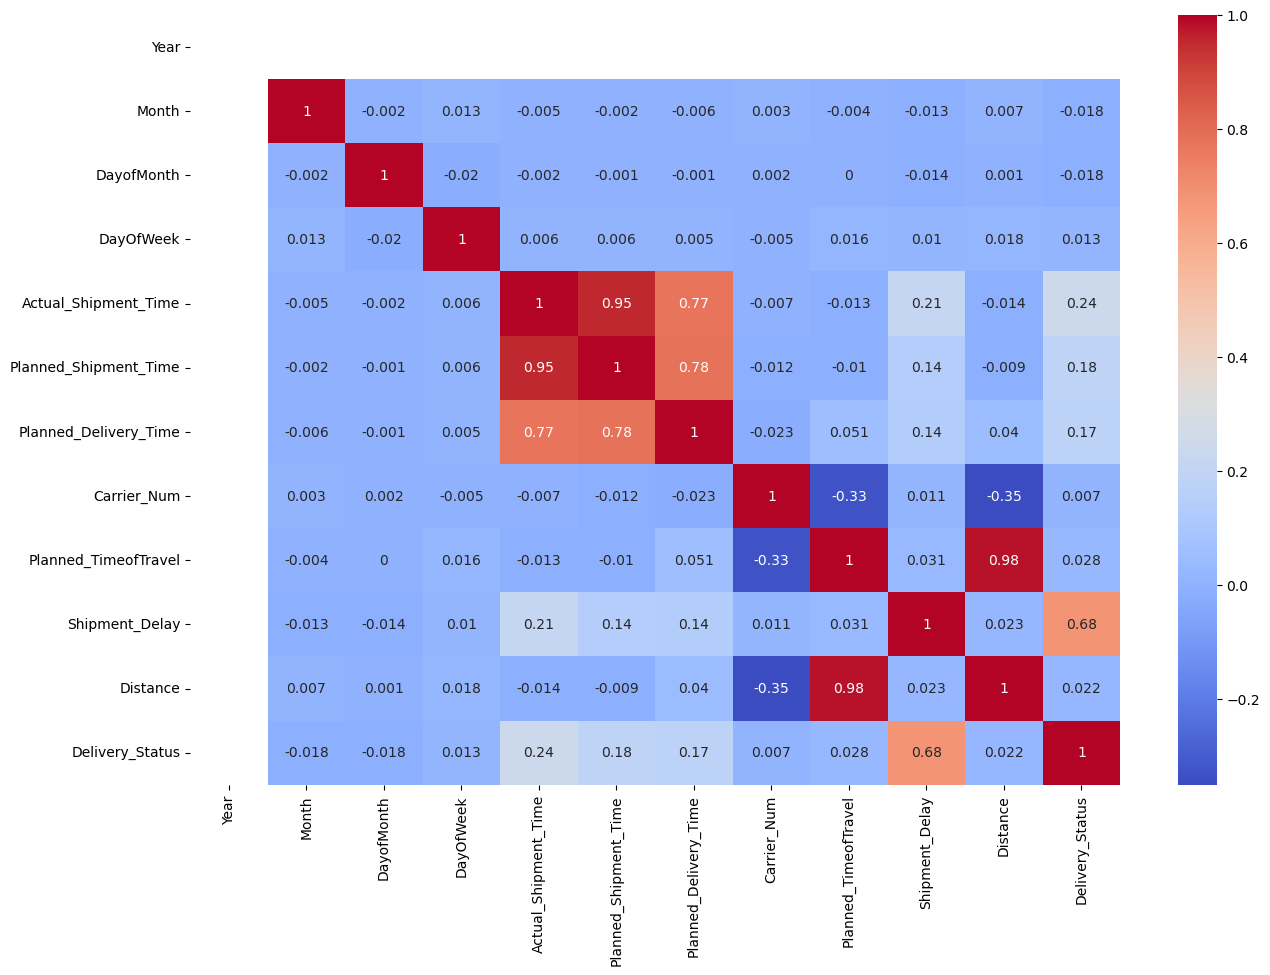

In [49]:
cor = delivery.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Status', ylabel='Actual_Shipment_Time'>

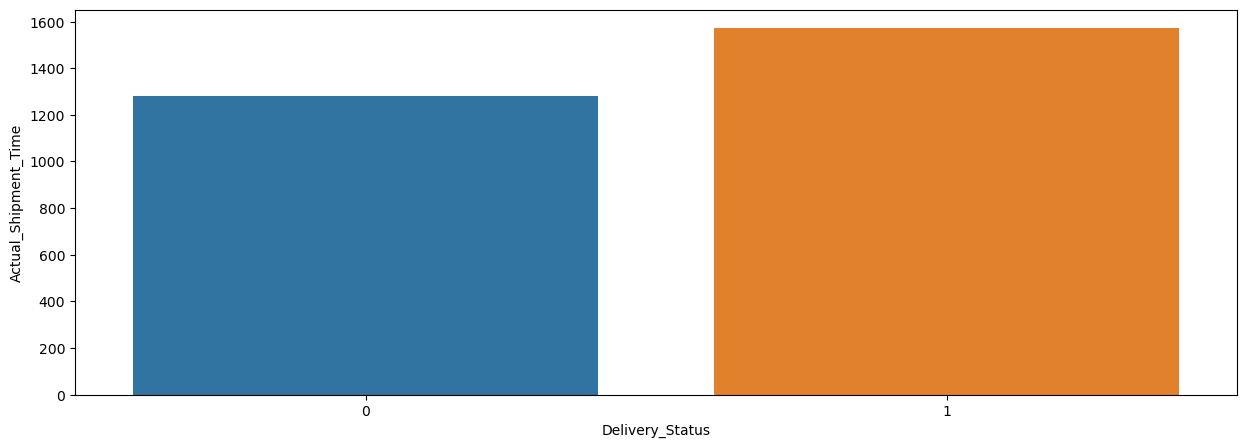

In [51]:
plt.figure(figsize =(15,5))

sns.barplot('Delivery_Status','Actual_Shipment_Time',data=delivery)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Status', ylabel='Planned_Delivery_Time'>

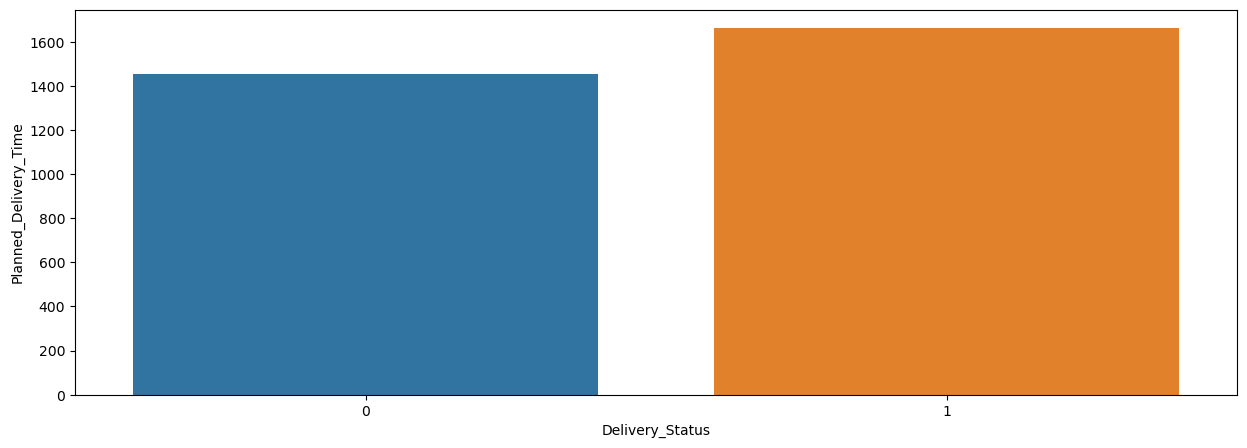

In [53]:
plt.figure(figsize =(15,5))

sns.barplot('Delivery_Status','Planned_Delivery_Time',data=delivery)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DayOfWeek', ylabel='Planned_Delivery_Time'>

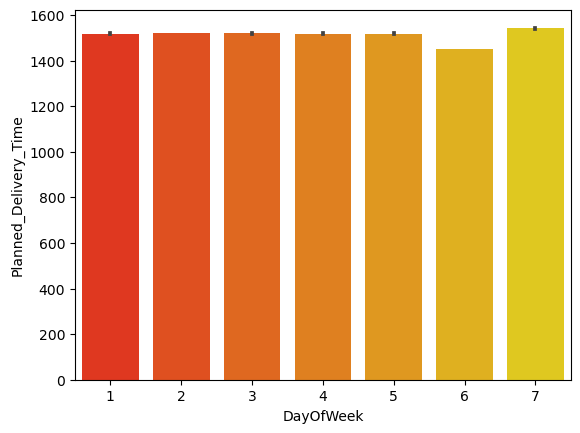

In [54]:
sns.barplot('DayOfWeek','Planned_Delivery_Time', palette='autumn', data=delivery, estimator=np.median)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

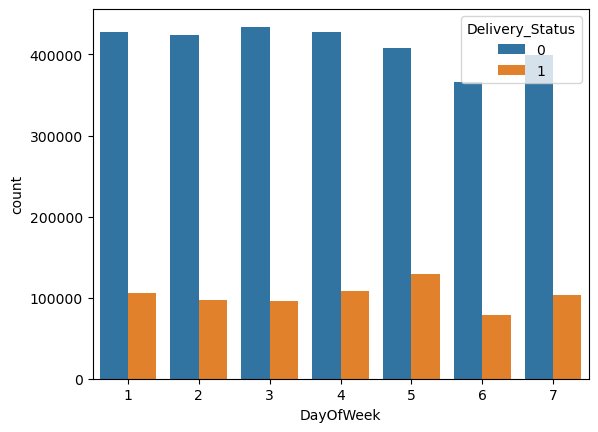

In [55]:
sns.countplot(x='DayOfWeek',data=delivery,hue = 'Delivery_Status')

<AxesSubplot:xlabel='Month', ylabel='count'>

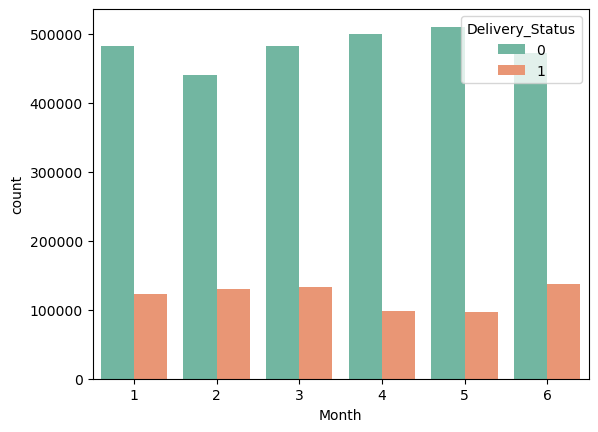

In [56]:
sns.countplot(x='Month',data=delivery,hue='Delivery_Status',palette='Set2')

<AxesSubplot:xlabel='DayofMonth', ylabel='count'>

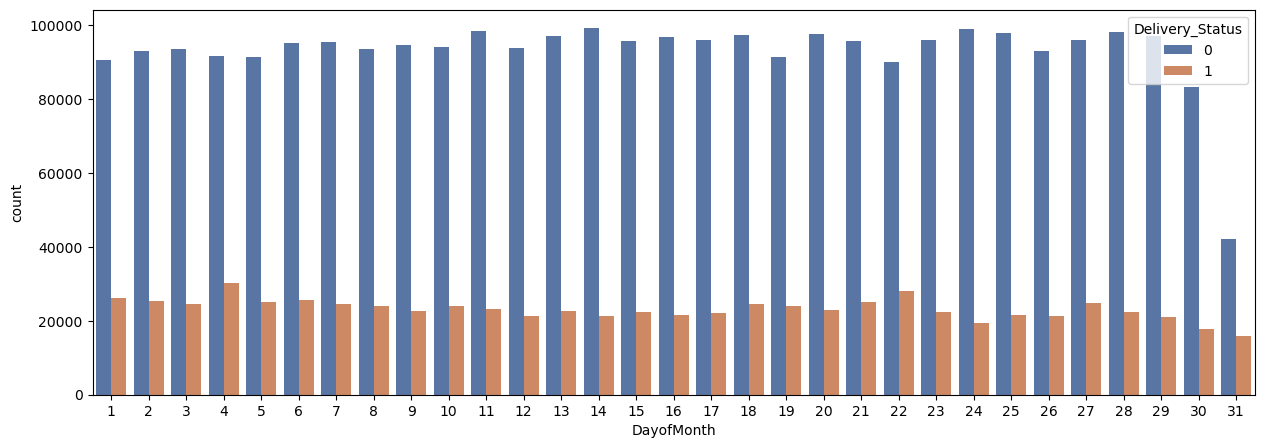

In [57]:
plt.figure(figsize =(15,5))
sns.countplot(x='DayofMonth',data=delivery,hue='Delivery_Status',palette="deep")

<AxesSubplot:xlabel='Delivery_Status', ylabel='Actual_Shipment_Time'>

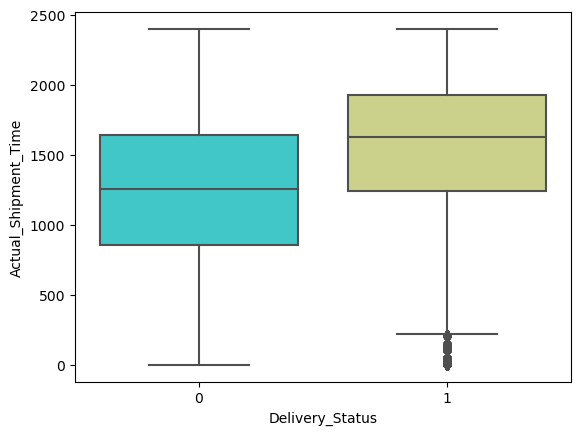

In [58]:
sns.boxplot(x="Delivery_Status", y="Actual_Shipment_Time", data=delivery,palette='rainbow')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Actual_Shipment_Time'>

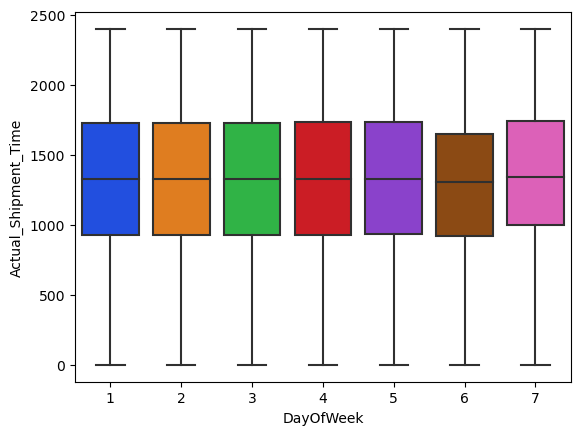

In [59]:
sns.boxplot(x="DayOfWeek", y="Actual_Shipment_Time", data=delivery,palette='bright')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Planned_Shipment_Time'>

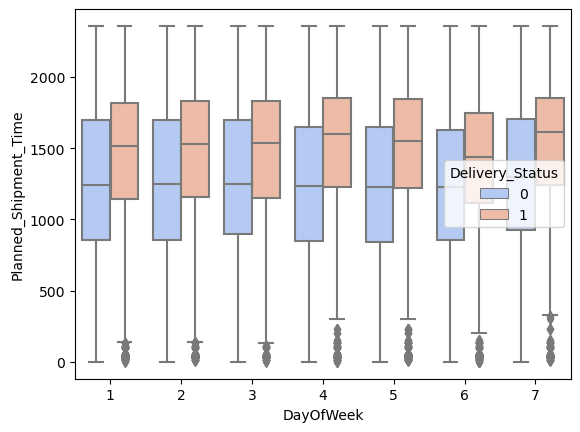

In [60]:
sns.boxplot(x="DayOfWeek", y="Planned_Shipment_Time", hue="Delivery_Status",data=delivery, palette="coolwarm")

In [61]:
delivery

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003,1955,2225,WN,335,150,8,IAD,TPA,810,0
1,2008,1,3,4,754,735,1000,WN,3231,145,19,IAD,TPA,810,1
2,2008,1,3,4,628,620,750,WN,448,90,8,IND,BWI,515,0
3,2008,1,3,4,926,930,1100,WN,1746,90,-4,IND,BWI,515,0
4,2008,1,3,4,1829,1755,1925,WN,3920,90,34,IND,BWI,515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059,1100,1256,DL,1547,236,-1,ATL,JAC,1572,0
3604171,2008,6,19,4,555,600,738,DL,1548,98,-5,RSW,ATL,515,0
3604172,2008,6,19,4,821,827,1003,DL,1548,96,-6,ATL,IND,432,0
3604173,2008,6,19,4,718,735,852,DL,1551,77,-17,CAE,ATL,191,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DayOfWeek', ylabel='Density'>

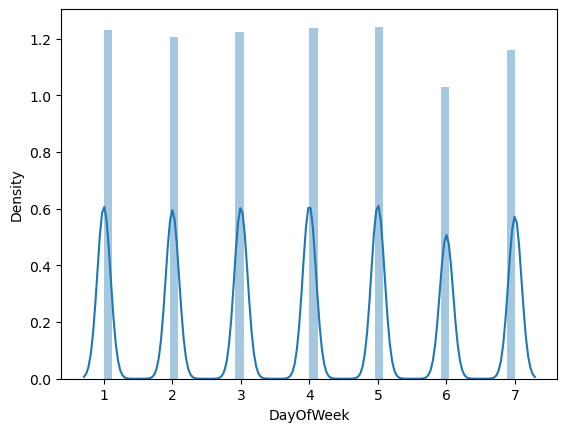

In [62]:
sns.distplot(delivery['DayOfWeek'])

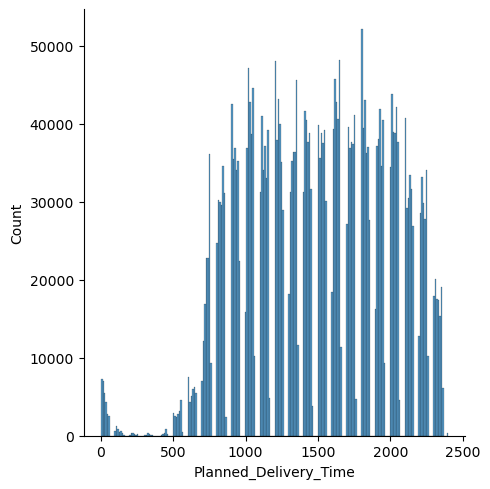

In [63]:
sns.displot(delivery['Planned_Delivery_Time'])

# ML Modeling

In [64]:
delivery

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003,1955,2225,WN,335,150,8,IAD,TPA,810,0
1,2008,1,3,4,754,735,1000,WN,3231,145,19,IAD,TPA,810,1
2,2008,1,3,4,628,620,750,WN,448,90,8,IND,BWI,515,0
3,2008,1,3,4,926,930,1100,WN,1746,90,-4,IND,BWI,515,0
4,2008,1,3,4,1829,1755,1925,WN,3920,90,34,IND,BWI,515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059,1100,1256,DL,1547,236,-1,ATL,JAC,1572,0
3604171,2008,6,19,4,555,600,738,DL,1548,98,-5,RSW,ATL,515,0
3604172,2008,6,19,4,821,827,1003,DL,1548,96,-6,ATL,IND,432,0
3604173,2008,6,19,4,718,735,852,DL,1551,77,-17,CAE,ATL,191,0


In [65]:
y = delivery.Delivery_Status

In [66]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Delivery_Status, dtype: int32

In [67]:
x = delivery.iloc[:,[2,3,4,5,6,10,]]

In [68]:
x.head()

,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Shipment_Delay
0,3,4,2003,1955,2225,8
1,3,4,754,735,1000,19
2,3,4,628,620,750,8
3,3,4,926,930,1100,-4
4,3,4,1829,1755,1925,34


In [69]:
x.shape

(3604171, 6)

# Train_Test_Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)

In [72]:
x_train.shape

(2883336, 6)

In [73]:
x_test.shape

(720835, 6)

# Logistics Resgression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model_logr = LogisticRegression()

In [76]:
model_logr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
predict_logr = model_logr.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(predict_logr,y_test)*100

97.95029375654623

In [85]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

model_knc = KNeighborsClassifier()

model_knc.fit(x_train,y_train)

predict_knc = model_knc.predict(x_test)

accuracy_score(predict_knc,y_test)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


99.30774726532424

In [82]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()

model_dtc.fit(x_train,y_train)

predict_dtc = model_dtc.predict(x_test)

accuracy_score(predict_dtc,y_test)*100

100.0

In [86]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

model_rfc.fit(x_train,y_train)

predict_rfc = model_rfc.predict(x_test)

accuracy_score(predict_rfc,y_test)*100

100.0